### Static Gel

In [1]:
from src.gelDosimetry import *

In [4]:
gel = gelDosimetryAnalysis()
gel.pre_ct_folder_path = '../CT/StaticGel_6_6_CT_Pre/'
gel.post_ct_folder_path = '../CT/StaticGel_6_6_CT_Post_Day2/'
gel.calculated_folder_path = '../Dose/'
gel.load()


In [6]:
gel.scale_dose()


In [7]:
gel.register_cts(z_shift=-94.6, y_shift=0, x_shift=1.0, roll_angle=0)


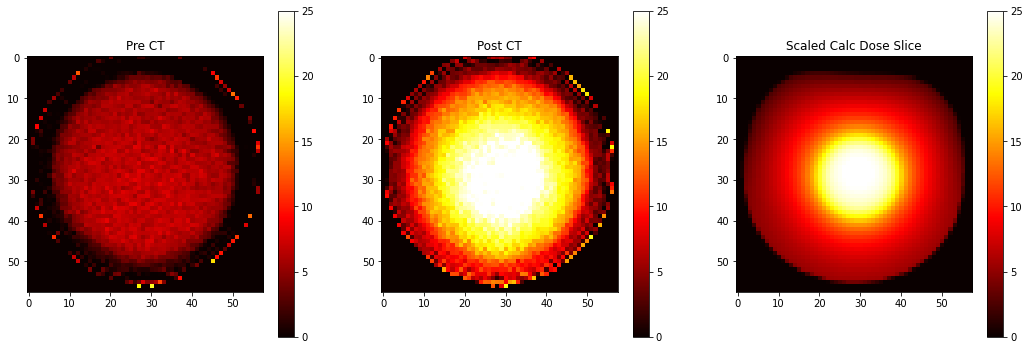

In [8]:
gel.process(ct_dose_reg_offset_h=1, ct_dose_reg_offset_w=2,
            show_ct_stats=False, show_ct_slices=True, show_pixel_variations=False)


In [9]:
gel.subtract()


In [10]:
gel.apply_mask(radius=26)


center: (29, 29)


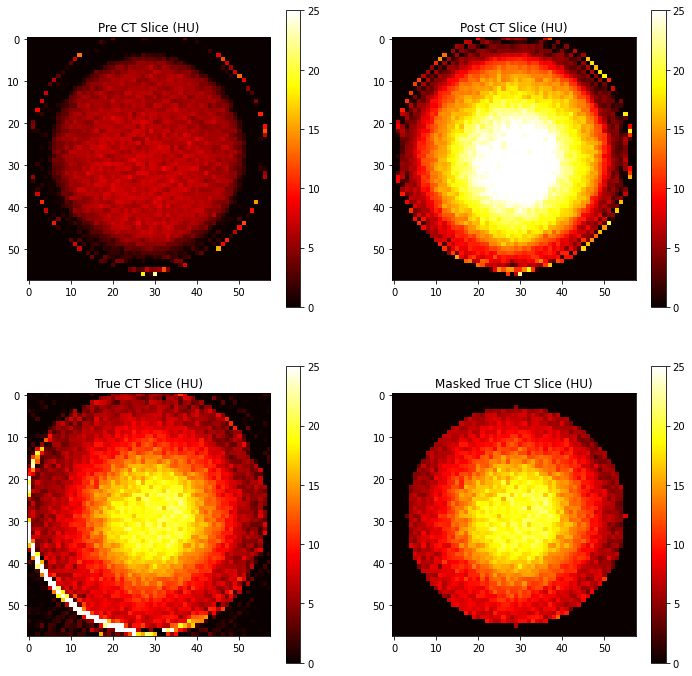

|                      Data |        Min |     Max |       Mean |   Median |       Std |
|---------------------------+------------+---------+------------+----------+-----------|
|         Pre CT Slice (HU) | -1004.97   | 22.8402 | -202.983   |  2.71244 | 391.895   |
|        Post CT Slice (HU) | -1006.25   | 28.5    | -194.889   |  9.8125  | 395.795   |
|        True CT Slice (HU) |   -42.5463 | 57.3533 |    8.09421 |  7.75578 |   8.38672 |
| Masked True CT Slice (HU) |     0      | 21.9963 |    7.03596 |  7.028   |   6.50342 |


In [11]:
gel.show_slices(show_data_stats=True, show_plots=True)


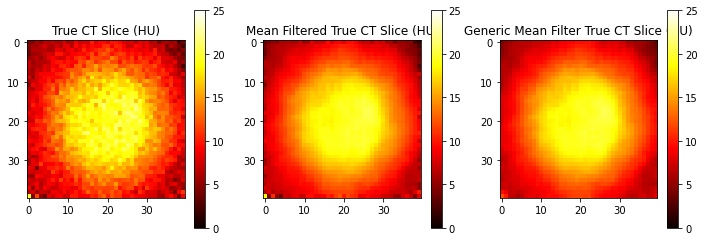

|                                  Data |       Min |     Max |     Mean |   Median |     Std |
|---------------------------------------+-----------+---------+----------+----------+---------|
|                         hu_true_slice | -42.5463  | 57.3533 |  8.09421 |  7.75578 | 8.38672 |
|                   hu_true_slice_small |   2.4201  | 21.9963 | 12.5657  | 12.0951  | 4.38436 |
|          filtered_hu_true_slice_small |   1.82703 | 20.7143 | 12.5092  | 11.9966  | 4.32359 |
| genereic_filtered_hu_true_slice_small |   3.3814  | 20.7143 | 12.5657  | 11.977   | 4.2346  |
9 -9


In [12]:
gel.filter(show_filtered_images=True, show_stats=True, use_masked_image=False)
print(gel.ofs_1, gel.ofs_2)


CT (HU)  vs  Dose (Gy)
fit function: arctan


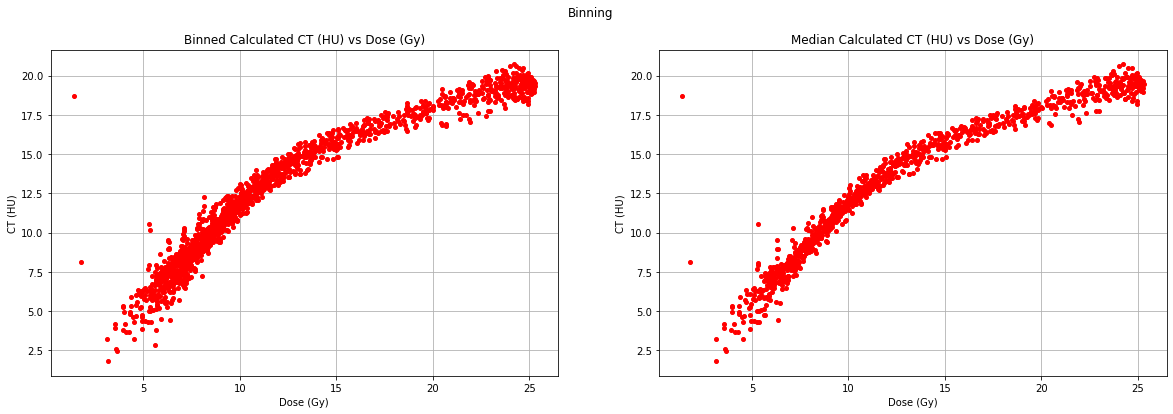

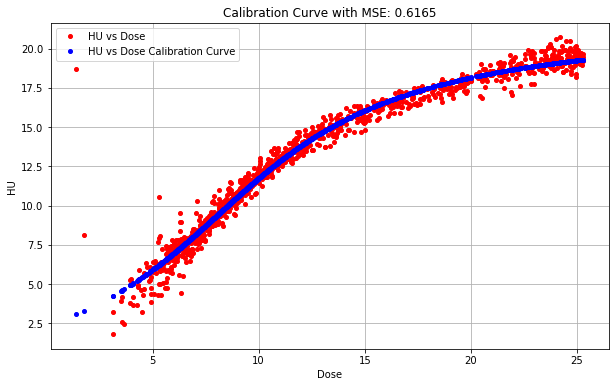

fit parameters:  [9.550027161849505, 8.09982230859064, 0.1519618812428405, 1.2412373936911025]
mse:  0.616494420901427
----------


In [13]:
gel.flip_arrays = True
gel.fit(show_plots=True, use_filtered_data=True,
        fitting_function=2, binning_method=2, bin_decimals=2)

# gel.data_plot_stats(gel.scaled_calc_median, plot=False)
# gel.data_plot_stats(gel.hu, plot=False)


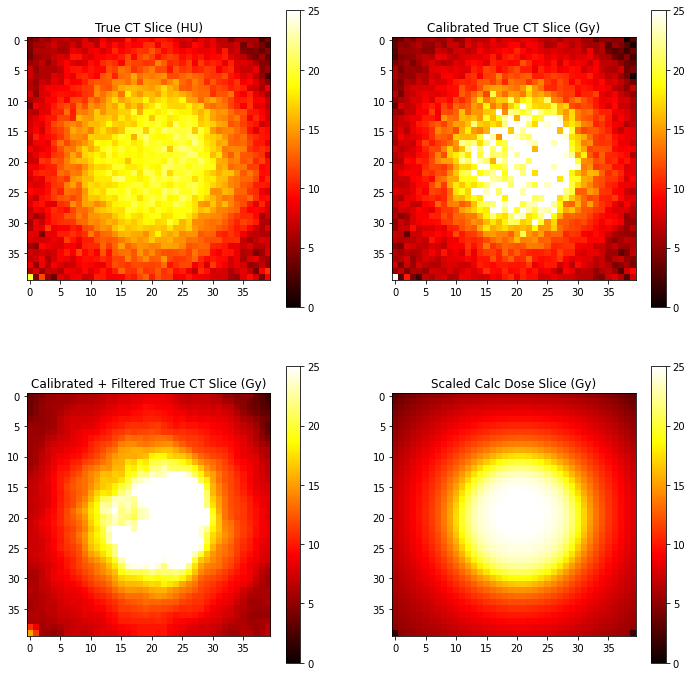

|                                     Data |      Min |      Max |    Mean |   Median |      Std |
|------------------------------------------+----------+----------+---------+----------+----------|
|                       True CT Slice (HU) | 2.4201   |  21.9963 | 12.5657 |  12.0951 |  4.38436 |
|            Calibrated True CT Slice (Gy) | 0.203597 | 200.599  | 13.1152 |  10.3066 | 10.0749  |
| Calibrated + Filtered True CT Slice (Gy) | 1.78067  |  66.7786 | 13.1152 |  10.2664 |  8.17209 |
|              Scaled Calc Dose Slice (Gy) | 1.38668  |  25.2902 | 12.2143 |  10.0205 |  6.03447 |


In [14]:
gel.calibrate(show_plots=True, show_stats=True)
# print(gel.hu_calibrated_array[15])
# print(gel.hu_array[15])


(40, 40) (40, 40)


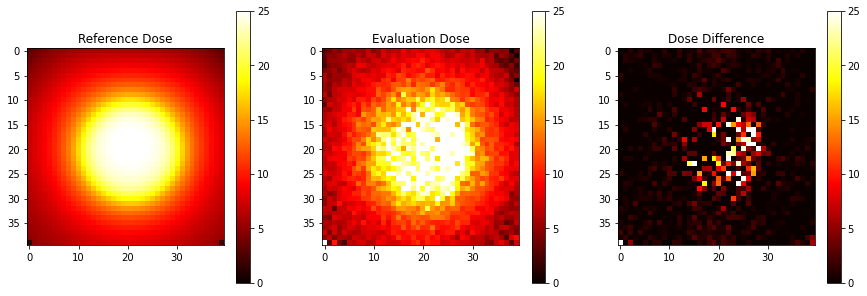

|            Data |        Min |      Max |      Mean |     Median |      Std |
|-----------------+------------+----------+-----------+------------+----------|
|  Reference Dose |   1.38668  |  25.2902 | 12.2143   | 10.0205    |  6.03447 |
| Evaluation Dose |   0.203597 | 200.599  | 13.1152   | 10.3066    | 10.0749  |
| Dose Difference | -10.175    | 177.312  |  0.900892 |  0.0824554 |  6.78331 |


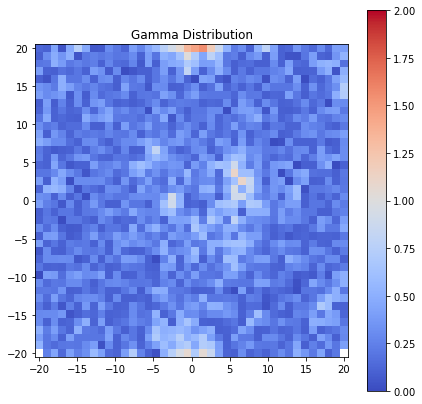

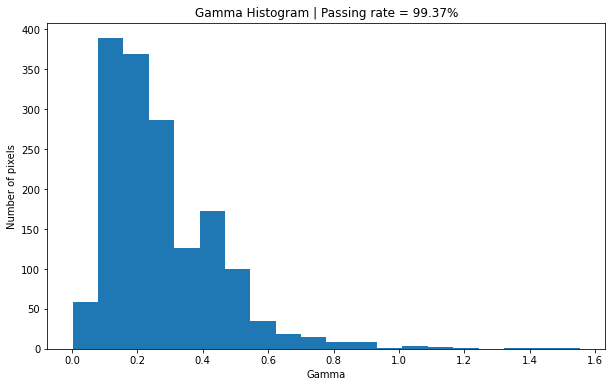

In [15]:
gel.gamma(filtered_dose_eval=False,
          show_dose_plot_stats=True, show_dose_plots=True)


### Gel Uncorrected Motion

In [16]:
gel_U = gelDosimetryAnalysis()
gel_U.pre_ct_folder_path = '../CT/StaticGel_6_6_CT_Pre/'
gel_U.post_ct_folder_path = '../CT/StaticGel_6_6_CT_Post_Day2/'
gel_U.calculated_folder_path = '../Dose/'
gel_U.load()
gel_U.scale_dose()
gel_U.register_cts(z_shift=-94.6, y_shift=0, x_shift=1.0, roll_angle=0)


(40, 40) (40, 40)


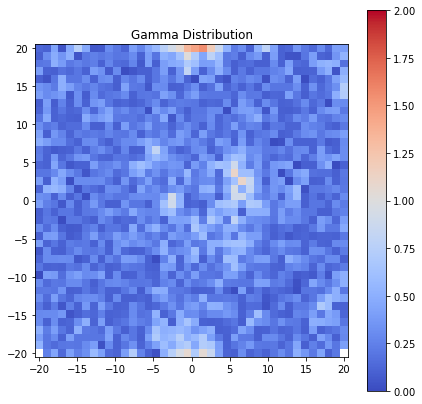

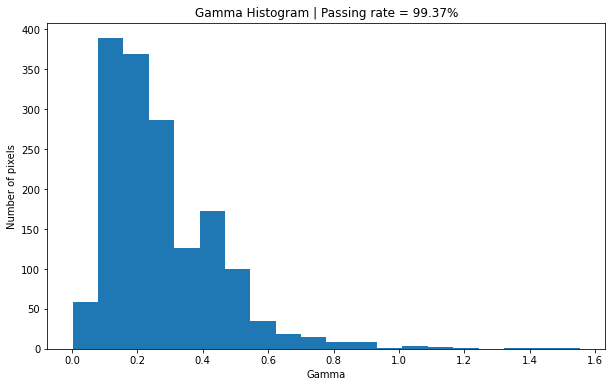

In [19]:
gel_U.process(ct_dose_reg_offset_h=1, ct_dose_reg_offset_w=2, show_ct_stats=False, show_ct_slices=False, show_pixel_variations=False)
gel_U.subtract()
# gel_U.apply_mask(radius=26)
gel_U.show_slices(show_data_stats=False, show_plots=False)

gel_U.filter(show_filtered_images=False, show_stats=False, use_masked_image=False)
# gel_U.fit(show_plots=False, use_filtered_data=True, fitting_function=1)
gel_U.flip_arrays = True
gel_U.fitting_function = 2
gel_U.fit_params = gel.fit_params
gel_U.calibrate(show_plots=False, show_stats=False)
gel_U.gamma(filtered_dose_eval=False, show_dose_plot_stats=False, show_dose_plots=False)


(36, 36) (36, 36)


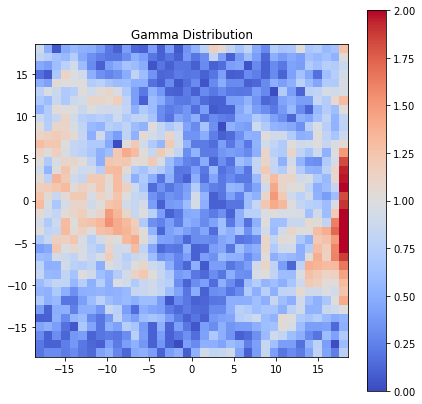

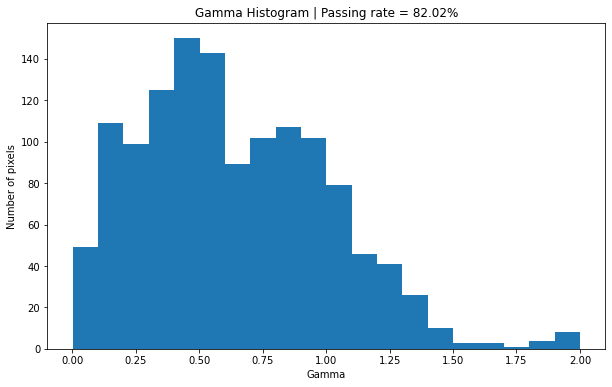

In [20]:
gel_U.process(ct_dose_reg_offset_h=1, ct_dose_reg_offset_w=-1, show_ct_stats=False, show_ct_slices=False, show_pixel_variations=False)
gel_U.subtract()
# gel_U.apply_mask(radius=26)
gel_U.show_slices(show_data_stats=False, show_plots=False)

gel_U.filter(show_filtered_images=False, show_stats=False, use_masked_image=False)
# gel_U.fit(show_plots=False, use_filtered_data=True, fitting_function=1)
gel_U.fitting_function = 2
gel_U.fit_params = gel.fit_params
gel_U.calibrate(show_plots=False, show_stats=False)
gel_U.gamma(filtered_dose_eval=False, show_dose_plot_stats=False, show_dose_plots=False)
